<a href="https://colab.research.google.com/github/sarathsreedharan/CS345/blob/master/spring24/notebooks/module08_03_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%autosave 0
%matplotlib inline

Autosave disabled


# Text Classification with Naive Bayes

### Using Probability In Learning

Given an estimate of $p(y | \mathbf{x})$, we would make a prediction according to

$$\hat{y} = \mathrm{arg} \max_y p(y | \mathbf{x}).$$

In logistic regression we estimated $p(y | \mathbf{x})$ directly.  Here we will take a different route, using Bayes' rule.

### Bayes' rule

The following relationship between two variables is known as *Bayes' rule*:

$$
    p(y|x)=\frac{p(x|y)p(y)}{p(x)}
$$

In machine learning we use an extended version of Bayes rule that describes the relationship between a label $y$ and a vector of variables $\mathbf{x}$:

$$
    p(y|\mathbf{x})=\frac{p(\mathbf{x}|y)p(y)}{p(\mathbf{x})}
$$

The Naive Bayes classifier is built on the basis of this relationship.


### Bayes' rule as a mode of inference

From the perspective of machine learning, Bayes rule provides a way of updating our confidence in an outcome as more evidence comes along.
Our *prior* probability for a class $y$ is $p(y)$.  After making an observation $\mathbf{x}$, we need to update our belief to $p(y|\mathbf{x})$ which is called the *posterior* probability.
The relationship between the posterior and prior is given by Bayes rule:

$$
\underbrace{p(y|\mathbf{x})}_{\mathrm{posterior}}=\frac{\overbrace{p(\mathbf{x}|y)}^{\mathrm{likelihood}}\overbrace{p(y)}^{\mathrm{prior}}}{p(\mathbf{x})}
$$

Or in other words:

$$\mathrm{posterior} \propto \mathrm{likelihood} \times \mathrm{prior} $$


### Maximum A-posteriori

The maximum a posteriori (MAP) rule:

$$
y_{\mathrm{MAP}}=\mathrm{arg}\max_y p(y|\mathbf{x}) = \mathrm{arg}\max_y \frac{p(\mathbf{x}|y)p(y)}{p(\mathbf{x})}=\mathrm{arg}\max_y p(\mathbf{x}|y)p(y)
$$


### Classification with Bayes’ rule

To use the MAP estimator we will estimate $p(\mathbf{x}|y)$.

**Example**: Predict whether or not a picnic spot is enjoyable

Assume that we have the following table as training data that relate a collection of features (whether it's sunny/rainy the temperature is warm/cold, the humidity, wind, and forecast) to the label that describes our level of enjoyment from our picnic spot:

|  |                 |                |                |                |     |     |
|--------------|--------|---------|----------------|----------------|------------------------|-------|
|              |$X_1$|$X_2$|$X_3$|$X_4$|$X_5$|$X_6$|$Y$|
|              |Sky|Temp|Humidity|Wind|Near water|EnjoySpt|
| **Row 1** |Sunny|Warm|Normal|Strong|Yes|Yes|
| **Row 2** |Sunny|Warm|High|Strong|No|Yes|
| **Row 3** |Rainy|Cold|High|Weak|No|No|
| **Row 4** |Cloudy|Mild|High|Weak|No|Yes|



How many parameters does this model have?
We will assume discrete binary features and a binary classification problem.

* Prior $p(y)$:  1 parameter
* Likelihood $p(\mathbf{x} | y)$: $2(2^d – 1)$


#### Exercise:

* What is the number of parameters for a classification problem with $k$ classes?
* What if each feature has $v$ possible values instead of two?


### The Naive Bayes assumption

Clearly, modeling $p(\mathbf{x} | y)$ directly does not scale well with the number of features.  We would need an exponential number of examples to reliably estimate those parameters (exponential in the number of features).

We will use the simplifying assumption of conditional independence:  given the class label, we will assume that the features are independent, i.e.
$$
p(\mathbf{x}|y)=p(x_1|y)p(x_2|y),\ldots,p(x_d|y).
$$


This model is now tractable and has $2d+1$ parameters for a binary classification problem with binary features.

We can now use Bayes' rule to obtain the Naive Bayes decision rule:
$$
y_{NB}=\mathrm{arg} \max_y P(\mathbf{x}|y)P(y)= \mathrm{arg} \max_y \prod_{i=1}^{d} p(x_i|y)p(y)
$$

If conditional independence holds, Naive Bayes is an optimal classifier!
Our next task is to estimate $p(x_i|y)$, which we will do using the principle of maximum likelihood.

### Binomial naive Bayes

Naive Bayes was one of the standard methods for text classification.  Binomial naive Bayes is motivated by this application.  For text classification we can represent a document by a vector of 1s and 0s that indicate presence/absence of a given word in the document.

Let's demonstrate that using scikit-learn's `CountVectorizer`:

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'This is not the first document']
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 1 1 0 0 0 1 0 1]
 [0 1 0 1 0 0 1 1 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [0 1 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'not' 'one' 'second' 'the' 'third' 'this']


Note that the return value of `CountVectorizer` is not a standard array:

In [4]:
X

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

### Reflection:

What are we missing by converting a document to a vector of presence/absence?

### Binomial Naive Bayes

Under this simple assumption that a feature occurs/doesn't occur, a very simple probabilistic model will work - the binomial distribution, which is characterized by a single parameter $p$.
When we extend things to $d$ binary features and $K$ classes we have for class $k$ parameters $p_{1k},\ldots,p_{dk}$ and

$$
p(x_j|y_k)=\space  \begin{cases} p_{jk} & \textrm{when} \space x_j=1 \newline
1- p_{jk} \space &\textrm{when} \space x_j=0
\end{cases}
$$

which can be expressed as:

$$
p(x_j|y_k) = p_{jk}^{x_j} (1-p_{jk})^{1-x_j}.
$$

Overall we then have:

$$
p(\mathbf{x}|y_k) = \prod_{j=1}^d p_{jk}^{x_j} (1-p_{jk})^{1-x_j}.
$$

We note that the above expression for $p(x_j|y_k)$ can be written as:

$$
p(x_j|y_k) = p_{jk}{x_j} + (1-p_{jk})(1-x_j).
$$

#### Implementation note

In practical implementations, it's a good idea to compute this product indirectly by working with the logarithms of the probabilities to avoid underflow.

### Example:  Email classification

Suppose our vocubulary contains three words a, b and c and we use a multivariate Bernoulli model for our emails, with parameters
        
     +(spam) = (0.5,0.67,0.33)   
     -(not spam)=(0.67,0.33,0.33)   

These are the parameter values for $p(a|+), p(b|+), p(c|+)$ and $p(a|-), p(b|-), p(c|-)$, respectively.

This means ,for example, that the presence of b is twice as likely in the spam class (+), compared with the non-spam class.

Suppose you are given an email that contains the words a and b but not c and hence is described by the bit vector $\mathbf{x}=(1,1,0)$.
We obtain likelihoods

$$
p(\mathbf{x}|+)={0.5 \times 0.67 \times 0.67} = 0.22
$$

$$
p(\mathbf{x}|-)={0.67 \times 0.33 \times 0.67} = 0.15
$$

If the two classes are equally probable we obtain that $\mathbf{x}$ should be classified as spam.


Before deriving the training procedure for Naive Bayes for a Bernoulli distribution we need to discuss the principle of maximum likelihood.

### Digression: maximum likelihood

Goal:  Fit a probabilistic model $p(x | \theta)$ to data, i.e.
estimate its parameters $\theta$.  Note that $x$ is a scalar value.

We are given independent identically distributed (i.i.d.) data $X = (x_1, x_2,\ldots, x_N)$.

The **Likelihood** of the data:

$$
  p(X|\theta)=p(x_1|\theta)p(x_2|\theta),...,p(x_N|\theta)      
$$

For simplicity we will work with the **Log likelihood**:

$$
  \log p(X|\theta)=\sum_{i=1}^{N}\log p(x_i|\theta)      
$$


The **Maximum likelihood solution** consists of the parameters $\theta$ that maximize $ \log p(X | \theta) $.  Note that maximizing the likelihood or the log-likelihood is equivalent.

### Maximum likelihood example

**Coin Toss**:
Estimate the probability $p$ that a coin lands “Heads” using the result of $N$ coin tosses, $h$ of which resulted in heads.

The likelihood of the data: $p(X|\theta)=p^h(1-p)^{(n-h)}$


Log likelihood: $\log p(X|\theta) = h \log p + (n-h) \log(1-p)$

Taking the derivative and setting to 0:

$$
        \frac{\partial \log p(X|\theta)}{\partial p}=\frac{h}{p}-\frac{(N-h)}{(1-p)}=0
$$        

$$
\implies p=\frac{h}{N}
$$



### Naive Bayes training

Training data: $(N \times d)$ feature matrix $X$,  and labels $y_1,\ldots,y_N$.

The maximum likelihood estimates for a feature vector $\mathbf{x}$ and label $y$ are given as follows.

The class prior is estimated as the number of examples with a given label:

$$
\hat{p}(y)=\frac{|\{i:y_i=y\}|}{N}.
$$

The likelihood is estimated by the appropriate frequency estimates from the training data matrix:

$$
\hat{p}(x_j|y)=\frac{\hat{p}(x_j,y)}{\hat{p}(y)}=\frac{\frac{|\{i:X_{ij}=x_{j},y_{i}=y\}|}{N}}{\frac{|\{i:y_i=y\}|}{N}}
$$



### Email classification: training the model

Suppose we have the following set of emails:

Email|a|b|c|Class
---|---|---|---|---
$e_1$|0|1|0|+
$e_2$|0|1|1|+
$e_3$|1|0|0|+
$e_4$|1|1|0|+
$e_5$|1|1|0|-
$e_6$|1|0|1|-
$e_7$|1|0|0|-
$e_8$|0|0|0|-

From this table we can compute estimates required for using the model:

$\hat{p}(+)=0.5, \hat{p}(-)=0.5$

$\hat{p}(a|+)=0.5, \hat{p}(a|-)=0.75$

$\hat{p}(b|+)=0.75, \hat{p}(b|-)=0.25$

$\hat{p}(c|+)=0.25, \hat{p}(c|-)=0.25$

The following piece of code computes these probablities:

In [6]:
import numpy as np

def calculate_probabilities(X, y):
    N,d = X.shape
    labels = np.unique(y)
    print("labels: ", labels)
    # compute the prior
    prior=np.zeros(shape=(2,))
    for label in labels :
        prior[label] = np.sum(y==label)/N
    probs=np.zeros(shape=(len(labels), d))
    for label in labels:
        probs[label] = (np.sum(X[y==label], axis=0) / N) / prior[label]

    return prior,probs

X = np.array(
    [[0, 1, 0],
     [0, 1, 1],
     [1, 0, 0],
     [1, 1, 0],
     [1, 1, 0],
     [1, 0, 1],
     [1, 0, 0],
     [0, 0, 0]])
y=np.array([1,1,1,1,0,0,0,0])
prior,probs = calculate_probabilities(X,y)

print('prior:', prior)
print('probabilities: ')
print('y=0', probs[0])
print('y=1', probs[1])


labels:  [0 1]
prior: [0.5 0.5]
probabilities: 
y=0 [0.75 0.25 0.25]
y=1 [0.5  0.75 0.25]


In [7]:
def predict(probs, prior, X):
    N,d = X.shape
    pred = np.zeros((N,len(prior)))
    for i in range(N):
        for label in range(len(prior)) :
            p = 1.0
            for j in range(d):
                p = p * probs[label][j]**X[i][j] * (1-probs[label][j])**(1-X[i][j])
            pred[i][label]=p / prior[label]
    return pred

print(predict(probs, prior, X))
0.25*0.25*0.75/0.5,0.5*0.75*0.75/0.5

[[0.09375 0.5625 ]
 [0.03125 0.1875 ]
 [0.84375 0.1875 ]
 [0.28125 0.5625 ]
 [0.28125 0.5625 ]
 [0.28125 0.0625 ]
 [0.84375 0.1875 ]
 [0.28125 0.1875 ]]


(0.09375, 0.5625)

In [8]:
p = predict(probs, prior, X)
p[:,0] > p[:, 1]

array([False, False,  True, False, False,  True,  True,  True])

### Comments on Naive Bayes

Usually features are not conditionally independent.
Despite that, Naive Bayes is still one of the most widely used classifiers due to its simple implementation and fast training.
It often performs well even when the assumption is violated.




### When there are few training examples

What if you have never seen a training example where a is present within our positive examples ($y=+$)?  In that case we have that:

$p(\mathbf{x} | +) = p(a | +) p(b | +) p(c | +) = 0$

What to do?

Add "virtual examples" for which a is present when y=spam.  In other words, rather than initialize all counts in the calculation of $p(x_j|y)$ to be zero, initialize them to some small numbers.
These are called **pseudo-counts**.


### Binomial Naive Bayes in scikit-learn with the 20 newsgroups dataset

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split into two subsets: one for training (or development) and the other one for testing (or for performance evaluation).

For illustration purposes we will use only two categories out of the 20: `alt.aetheism` and `sci.space`.

In [9]:
# load the dataset
from sklearn.datasets import fetch_20newsgroups
cats=['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=cats)
# we eliminated the headers and footers of the emails which
# are a giveaway of the class labels

Let's take a look at the labels:

In [10]:
print(newsgroups_train.target)
print(newsgroups_train.target.shape)
print(newsgroups_train.target_names)

[0 1 1 ... 1 1 1]
(1073,)
['alt.atheism', 'sci.space']


A look at the data

In [11]:
newsgroups_train.data[0]

': \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.'

Now we need to convert the text into vectors of numerical values.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(newsgroups_train.data)
print(X_train.shape)

(1073, 18217)


Let's do the same for the test data:

In [13]:
#fetching the test data
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=cats)
X_test = vectorizer.transform(newsgroups_test.data)

Now we are ready to apply the scikit-learn version of Naive Bayes:

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import metrics
#nb = MultinomialNB(alpha=.01)
nb = BernoulliNB(alpha=0.1)
nb.fit(X_train, newsgroups_train.target)

pred = nb.predict(X_test)

Note that the parameter $\alpha$ of the scikit-learn implementation is a hyperparameter that controls the use of pseudo-counts, i.e. what value to assign a feature that has not been seen.  Like the $\alpha$ parameter of linear regression and logistic regression, it serves to help avoid overfitting.

The accuracy of the classifier:

In [15]:
print ('accuracy: ', np.sum(pred==newsgroups_test.target) / len(pred))

accuracy:  0.8597475455820477


In [16]:
newsgroups_train.target_names

['alt.atheism', 'sci.space']

In [17]:
metrics.confusion_matrix(newsgroups_test.target, pred,  labels=[0,1])

array([[310,   9],
       [ 91, 303]])

In [18]:
len(newsgroups_train.target),np.sum(newsgroups_train.target==1)

(1073, 593)

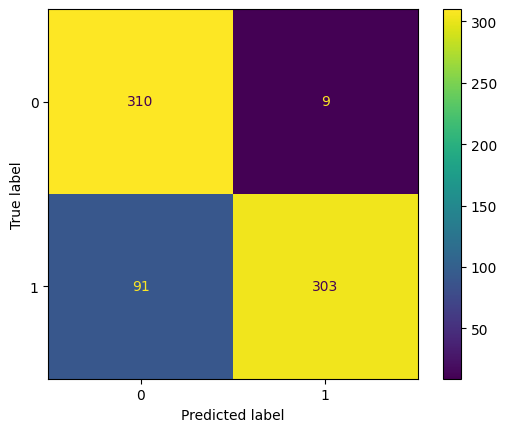

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nb,X_test,newsgroups_test.target)


Let's apply our model to sentences that seem relevant to to the two categories ('alt.atheism', 'sci.space') and see how it does:

In [26]:
sentences = [
    'sending a payload to the international space station',
    'religion and its role in American politics',
    'the astronaut launched yesterday has no spiritual beliefs',
    'the astronaut reached the station',
]
X_unlabeled = vectorizer.transform(sentences)
pred = nb.predict(X_unlabeled)
probs = nb.predict_proba(X_unlabeled)
for i in range(len(sentences)) :
    print (sentences[i])
    print('predicted class: ', newsgroups_train.target_names[pred[i]])
    print('probabilities: ', probs[i])


sending a payload to the international space station
predicted class:  sci.space
probabilities:  [0.07910088 0.92089912]
religion and its role in American politics
predicted class:  alt.atheism
probabilities:  [9.99999874e-01 1.26343962e-07]
the astronaut launched yesterday has no spiritual beliefs
predicted class:  alt.atheism
probabilities:  [9.99832216e-01 1.67783690e-04]
the astronaut reached the station
predicted class:  alt.atheism
probabilities:  [0.97397014 0.02602986]


### Multinomial Naive Bayes

Up until now we assumed that each feature was either present or absent.  In probabilistic terms, we modeled each feature using the binomial distribution.  For text data for example, there is potential information in the counts, i.e. how many times a word appears in a document, not just its presence of absence.  To model counts we can use the multinomial distribution:  each feature is now associated with a multinomial variable.



### Exercises

* The `CountVectorizer` converts all tokens to lowercase before generating its output.  Why is that useful?

* Use [multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) instead of Bernoulli Naive Bayes.  You will need to recreate the training/test vectors to be counts rather than presence/absence.  Which version of Naive Bayes performed better?  Can you provide an explanation why?


In [ ]:
# multinomial naive Bayes applied to the 20 newsgroups data

### Gaussian naive Bayes

If you are dealing with data whose features are continuous rather than discrete, you need to model $p(x_i | y)$ using an appropriate distribution.  A common choice is to use the normal (aka Gaussian) distribution:

$$
p(x_i | y) = \frac{1}{\sqrt{2\pi \sigma_{iy}^2}} e^{- \frac{(x_i - \mu_{iy})^2}{2\sigma_{iy}^2}},
$$

where $\mu_{iy}$ is the mean for feature $i$ in class $y$ and $\sigma_{iy}$ is the standard deviation for feature $i$ in class $y$.

In scikit-learn Gaussian naive Bayes is implemented as the class [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB).

### Exercise

* Apply Gaussian Naive Bayes to the iris dataset, and compare its performance to the classifier of your choice.

### Comments

An advantage of naive Bayes is that it requires a relatively small number of training data to estimate its parameters, so for relatively small datasets it may work very well.
For larger datasets other classifiers will likely outperform it (see
Caruana et al. referenced below).
In any case, it is still a good baseline, especially for text classification.

### References

* Domingos, P., & Pazzani, M. (1997). Beyond Independence: Conditions for the Optimality of the Simple Bayesian Classifier. Machine Learning. 29, 103-130.
* Caruana, R.; Niculescu-Mizil, A. (2006). An empirical comparison of supervised learning algorithms. Proc. 23rd International Conference on Machine Learning.